In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering

# Download data

In [2]:
df_client = pd.read_excel("data/clients.xlsx")
df_action = pd.read_excel("data/actions.xlsx")
df_transactions = pd.read_excel("data/transactions.xlsx")

In [3]:
df_client.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1


In [4]:
df_action.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,NaN,Exclusive Offer,c34394230,1,1


In [5]:
df_transactions.head()

,client_id,transaction_id,transaction_date,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style
0,c17974679,t11288118,2020-07-25,1,3044,Women Ready-to-Wear,Unknown,Casual Style
1,c17974679,t93389142,2020-06-20,1,569,Women Accessory,Unknown,Stylish Fashion
2,c17974679,t62924895,2021-01-13,1,7727,Women Bags,Unknown,Leather
3,c17974679,t93389142,2020-06-20,1,3954,Women Ready-to-Wear,Unknown,Casual Style
4,c17974679,t33368160,2021-05-03,1,1541,Women Ready-to-Wear,bottom segment,Casual Style


In [6]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28751 entries, 0 to 28750
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   client_id                                28751 non-null  object
 1   client_country                           19095 non-null  object
 2   client_gender                            12544 non-null  object
 3   client_nationality                       12601 non-null  object
 4   client_city                              10487 non-null  object
 5   client_premium_status                    28751 non-null  int64 
 6   client_is_phone_contactable              28751 non-null  int64 
 7   client_is_email_contactable              28751 non-null  int64 
 8   client_is_instant_messaging_contactable  28751 non-null  int64 
 9   client_is_contactable                    28751 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


In [7]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   action_id                 10000 non-null  object        
 1   action_type_label         10000 non-null  object        
 2   action_subcategory_label  10000 non-null  object        
 3   action_start_date         10000 non-null  datetime64[ns]
 4   action_year               10000 non-null  int64         
 5   action_end_date           10000 non-null  datetime64[ns]
 6   action_collection_year    10000 non-null  int64         
 7   action_collection         9999 non-null   object        
 8   action_universe           10000 non-null  object        
 9   action_category_label     10000 non-null  object        
 10  action_channel            8689 non-null   object        
 11  action_label              10000 non-null  object        
 12  client_id          

In [8]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54638 entries, 0 to 54637
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   client_id            54638 non-null  object        
 1   transaction_id       54638 non-null  object        
 2   transaction_date     54638 non-null  datetime64[ns]
 3   product_quantity     54638 non-null  int64         
 4   gross_amount_euro    54638 non-null  int64         
 5   product_category     54638 non-null  object        
 6   product_subcategory  54638 non-null  object        
 7   product_style        54631 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 3.3+ MB


# EDA Client & Actions

We want first to do an analysis on the clients and actions dataframes.

In [9]:
# Merge the client dataframe with the action dataframe on the `client_id`
df_merged = df_client.merge(df_action, how="left", on="client_id")
df_merged.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,...,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_is_present,client_is_invited
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1,...,2020.0,2020-11-02,2020.0,Fall Collection,Men's Fashion,Client,Outside venue,Business Engagement,1.0,1.0
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1,...,2021.0,2021-12-09,2021.0,Retail Action,Women's Fashion,Retail,In store,Holiday Celebration,1.0,1.0
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1,...,2021.0,2021-12-09,2021.0,Retail Action,Women's Fashion,Retail,In store,Holiday Celebration,1.0,1.0
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1,...,2021.0,2021-12-09,2021.0,Retail Action,Women's Fashion,Retail,In store,Holiday Celebration,1.0,1.0
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1,...,2022.0,2022-03-05,2022.0,Summer Collection,Women's Fashion,Retail,In store,Exclusive Offer,1.0,1.0


In [123]:
# Print the info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15310670 entries, 0 to 27646809
Data columns (total 9 columns):
 #   Column               Dtype         
---  ------               -----         
 0   client_id            object        
 1   transaction_id       object        
 2   transaction_date     datetime64[ns]
 3   product_quantity     int64         
 4   gross_amount_euro    int64         
 5   product_category     object        
 6   product_subcategory  object        
 7   product_style        object        
 8   action_start_date    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 1.1+ GB


<Axes: title={'center': 'Premium Status Distribution'}, xlabel='client_premium_status'>

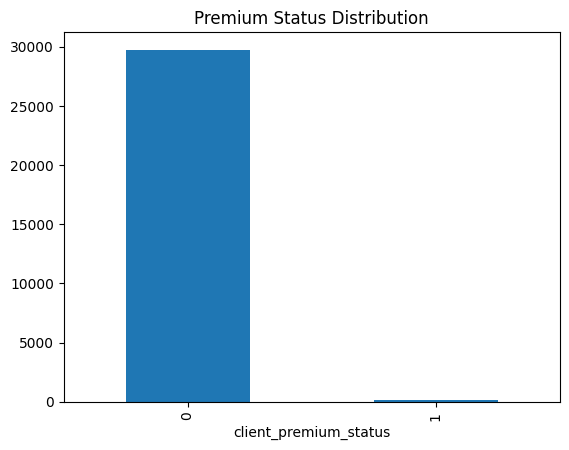

In [11]:
# Look at the distribution of Premium clients among all the clients
df_merged["client_premium_status"].value_counts().plot(
    kind="bar", title="Premium Status Distribution"
)

<Axes: title={'center': 'Action Count by Contactability'}, xlabel='client_is_contactable'>

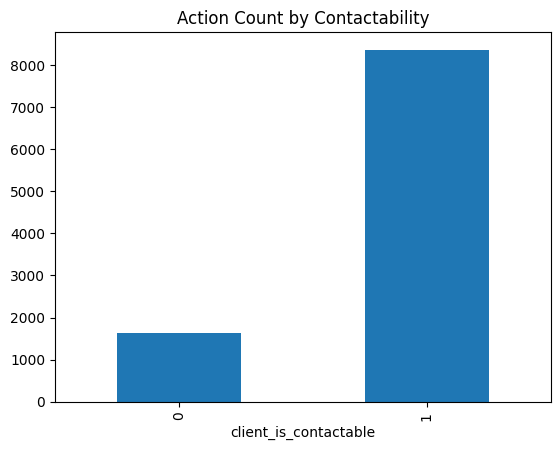

In [12]:
# Look at the proportion of people invited that are contactable
df_merged.groupby("client_is_contactable")["action_id"].count().plot(
    kind="bar", title="Action Count by Contactability"
)

We can see that some clients that are not contactable are still invited. 

<Axes: title={'center': 'Action Category Distribution'}, xlabel='action_category_label'>

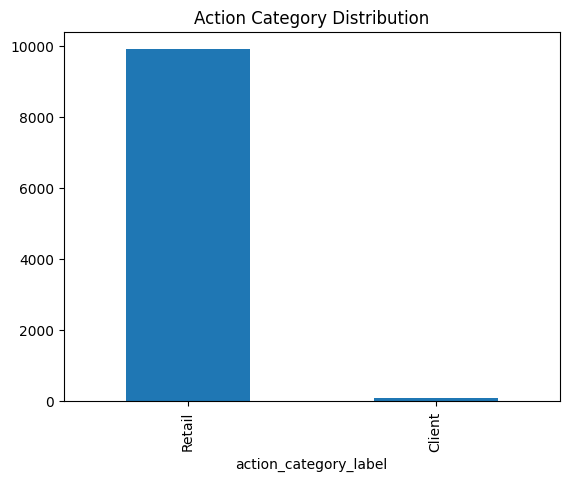

In [13]:
# Plot the distribution of the category of event invitaition
df_merged["action_category_label"].value_counts().plot(
    kind="bar", title="Action Category Distribution"
)

<Axes: title={'center': 'Action Type Distribution'}, xlabel='action_type_label'>

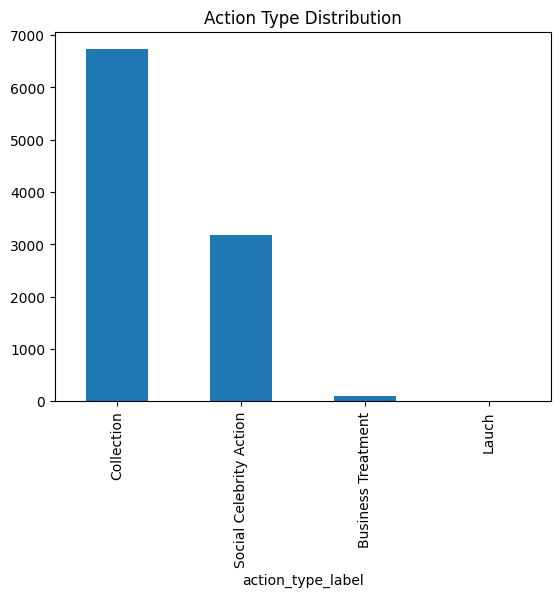

In [14]:
# Plot the distribution of type of event.
df_merged["action_type_label"].value_counts().plot(
    kind="bar", title="Action Type Distribution"
)

<Axes: title={'center': 'Action Channel Distribution'}, xlabel='action_channel'>

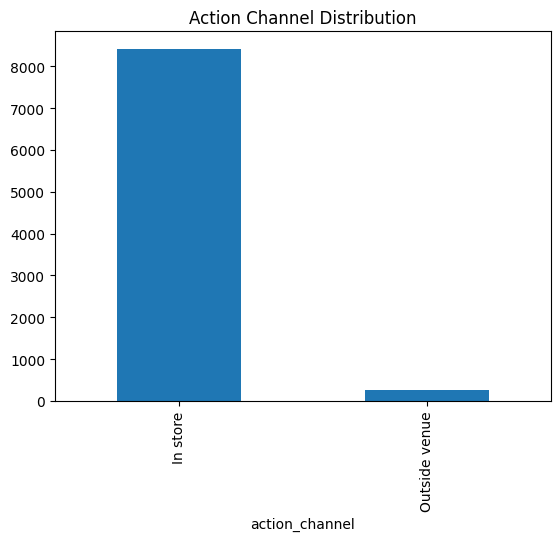

In [15]:
# Plot of the distribution of the action channel
df_merged["action_channel"].value_counts().plot(
    kind="bar", title="Action Channel Distribution"
)

<Axes: title={'center': 'Action Count by Gender'}, xlabel='client_gender'>

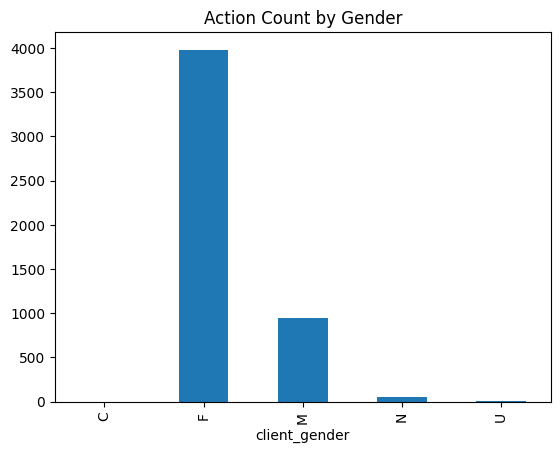

In [16]:
# Plot the distribution of invitation per gender
df_merged.groupby("client_gender")["action_id"].count().plot(
    kind="bar", title="Action Count by Gender"
)

<Axes: title={'center': 'Top 10 Nationalities by Action Count'}, xlabel='client_nationality'>

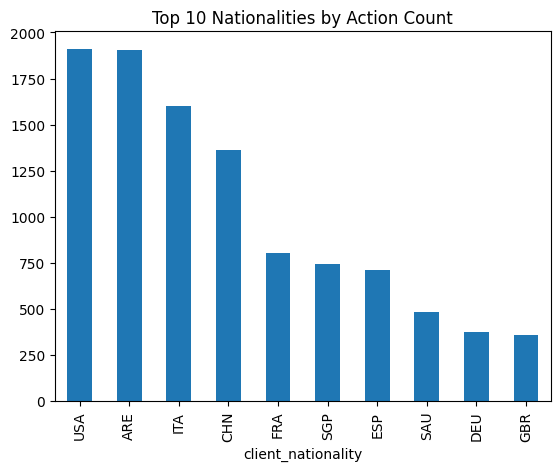

In [17]:
# Plot the top 10 nationalities that were the most invited
top_nationalities = df_merged["client_nationality"].value_counts().head(10)
top_nationalities.plot(kind="bar", title="Top 10 Nationalities by Action Count")

<Axes: title={'center': 'Actions Over Time'}, xlabel='action_start_date'>

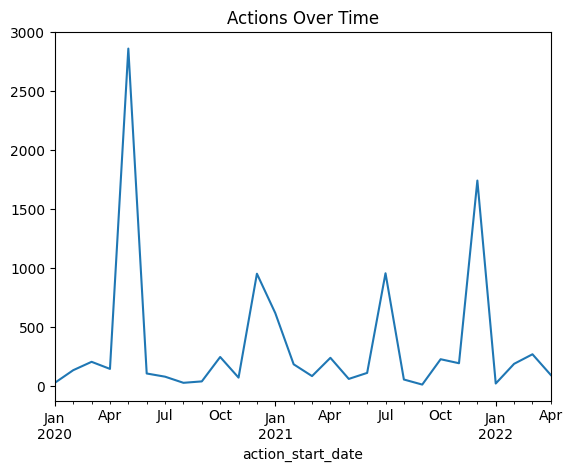

In [18]:
# The evolution of the number of invitation over time
df_merged.groupby(df_merged["action_start_date"].dt.to_period("M"))[
    "action_id"
].count().plot(kind="line", title="Actions Over Time")

<Axes: title={'center': 'Actions by Collection Year'}, xlabel='action_collection_year'>

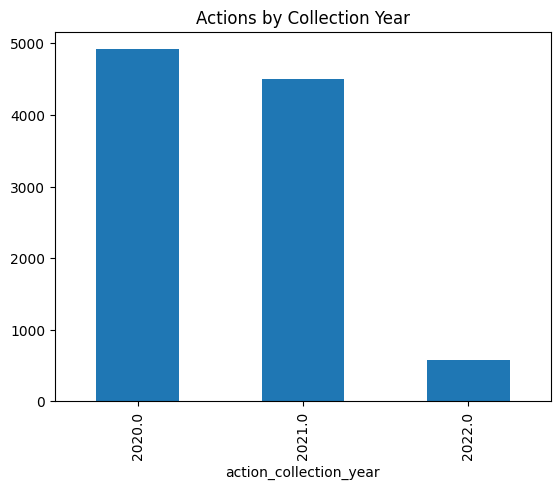

In [19]:
# Plot the distribution of actions per collection  year
df_merged.groupby("action_collection_year")["action_id"].count().plot(
    kind="bar", title="Actions by Collection Year"
)

<Axes: title={'center': 'Action Count by Client Presence'}, xlabel='client_is_present'>

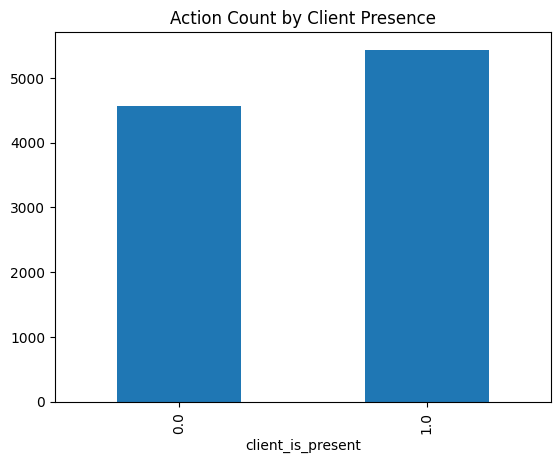

In [20]:
# Plot the number of clients that came vs that didn't come
df_merged.groupby("client_is_present")["action_id"].count().plot(
    kind="bar", title="Action Count by Client Presence"
)

<Axes: title={'center': 'Histogram of Actions per Client'}, ylabel='Frequency'>

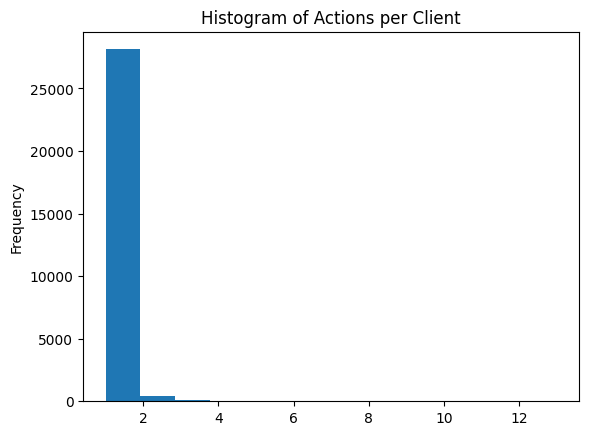

In [21]:
# Plot the distribution of the number of invitation per client
df_merged["client_id"].value_counts().plot(
    kind="hist", bins=13, title="Histogram of Actions per Client"
)

<Axes: title={'center': 'Premium Clients by Action Channel'}, xlabel='action_channel'>

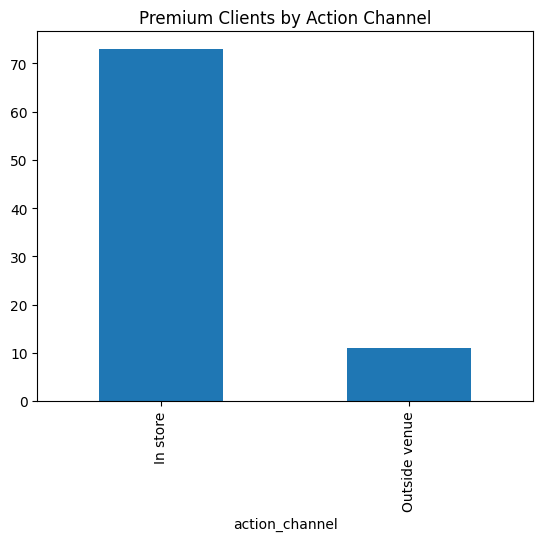

In [22]:
# Plot among the premium clients the distribution of action channel
premium_channel_counts = (
    df_merged[df_merged["client_premium_status"] == 1]
    .groupby("action_channel")["action_id"]
    .count()
)
premium_channel_counts.plot(kind="bar", title="Premium Clients by Action Channel")

<Axes: title={'center': 'Non Premium Clients by Action Channel'}, xlabel='action_channel'>

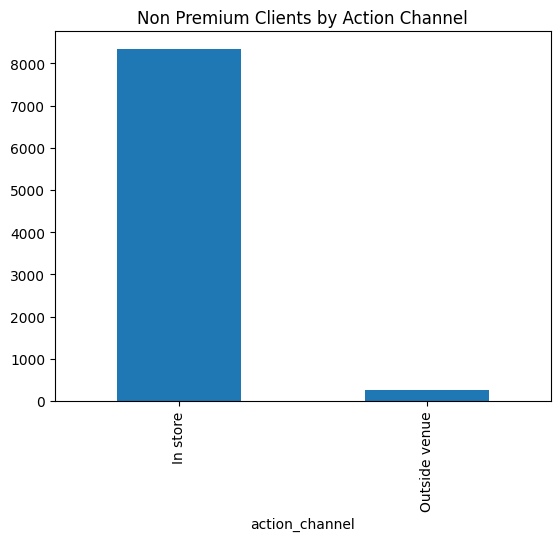

In [23]:
# Plot among the non-premium clients the distribution of action channel
premium_channel_counts = (
    df_merged[df_merged["client_premium_status"] == 0]
    .groupby("action_channel")["action_id"]
    .count()
)
premium_channel_counts.plot(kind="bar", title="Non Premium Clients by Action Channel")

<Axes: title={'center': 'Action Types by Gender'}, xlabel='client_gender'>

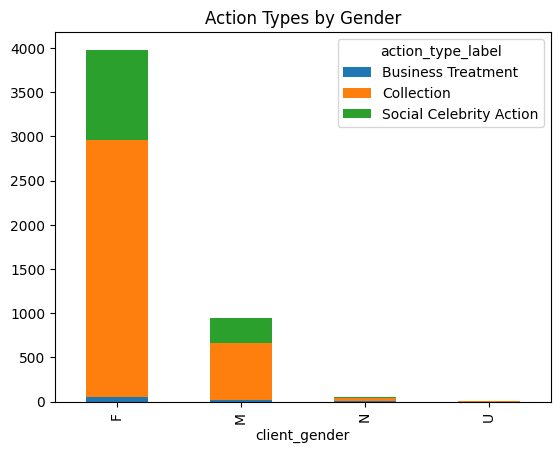

In [24]:
# Plot the distribution of action types per gender
gender_action_counts = (
    df_merged.groupby(["client_gender", "action_type_label"])["action_id"]
    .count()
    .unstack()
)
gender_action_counts.plot(kind="bar", stacked=True, title="Action Types by Gender")

In [25]:
# Check the proportion of premium clients with more than one invitation
# Filter premium clients
premium_clients = df_merged[df_merged["client_premium_status"] == 1]

# Count actions per client
action_count_per_client = premium_clients["client_id"].value_counts()

# Find the premium clients with more than one action
clients_with_multiple_actions = action_count_per_client[action_count_per_client > 1]

# Calculate the proportion
proportion_multiple_actions = len(clients_with_multiple_actions) / len(
    action_count_per_client
)

# Display the result
print(
    f"Proportion of premium clients with more than one action: {proportion_multiple_actions:.2f}"
)

Proportion of premium clients with more than one action: 0.19


In [27]:
#  Ensure action_start_date and action_end_date are datetime
df_merged["action_start_date"] = pd.to_datetime(df_merged["action_start_date"])
df_merged["action_end_date"] = pd.to_datetime(df_merged["action_end_date"])

# Step 2: Calculate time spent for each action (in seconds or minutes)
df_merged["time_spent"] = (
    df_merged["action_end_date"] - df_merged["action_start_date"]
).dt.total_seconds()  # Time in seconds

# Optional: Convert to minutes if you prefer
df_merged["time_spent"] = df_merged["time_spent"] / 60 / 60 / 24  # Time in days

time_spent_stats = df_merged["time_spent"].describe()

print("Descriptive statistics for time spent on actions:")
print(time_spent_stats)

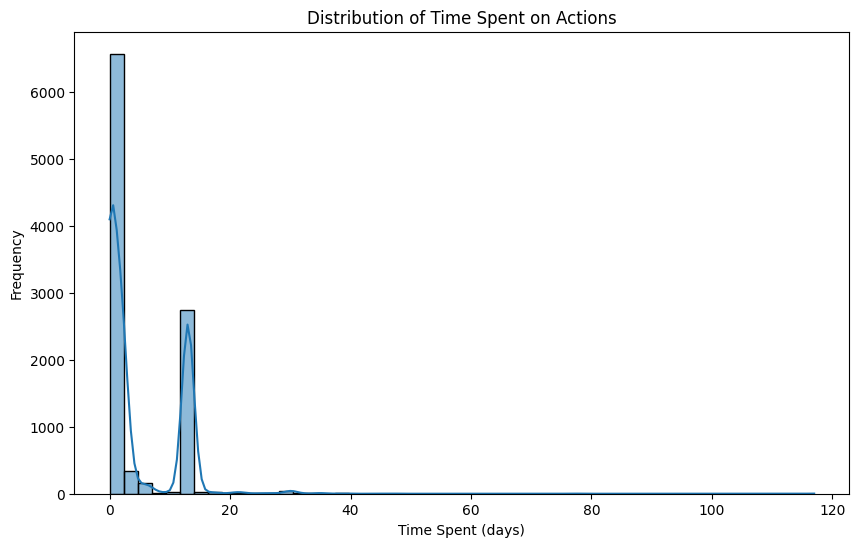

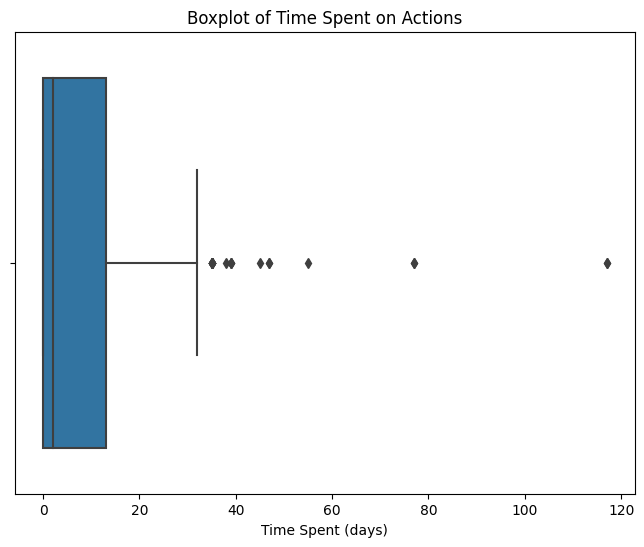

In [29]:
# Plot the distribution of time spent per action
plt.figure(figsize=(10, 6))
sns.histplot(df_merged["time_spent"], kde=True, bins=50)
plt.title("Distribution of Time Spent on Actions")
plt.xlabel("Time Spent (days)")
plt.ylabel("Frequency")
plt.show()

# Plot the box plot of time spent per action
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_merged["time_spent"])
plt.title("Boxplot of Time Spent on Actions")
plt.xlabel("Time Spent (days)")
plt.show()

In [30]:
# Show the time spent by action collection
action_collection_stats = df_merged.groupby("action_collection")[
    "time_spent"
].describe()
print("Time Spent by Action Collection:")
action_collection_stats

Time Spent by Action Collection:


,count,mean,std,min,25%,50%,75%,max
action_collection,,,,,,,,
ABCDER Collection,2732.0,13.000000,0.000000,13.0,13.0,13.0,13.00,13.0
Art Collection,15.0,7.933333,10.957494,0.0,0.0,0.0,13.00,38.0
Cote d'Azur Collection,20.0,2.650000,6.706438,0.0,0.0,0.0,0.75,22.0
Fall Collection,1443.0,2.459459,3.677383,0.0,2.0,2.0,2.00,35.0
Fall-Winter Collection,7.0,12.428571,16.661904,0.0,2.0,4.0,16.00,47.0
Formal Retail Action,9.0,2.888889,1.452966,0.0,2.0,3.0,4.00,5.0
Glamorous Collection,11.0,6.636364,1.206045,3.0,7.0,7.0,7.00,7.0
Lady Collection,286.0,1.122378,2.609508,0.0,1.0,1.0,1.00,45.0
Mid-Season Jewelry and Timepieces,211.0,0.696682,3.529864,0.0,0.0,0.0,0.00,25.0


In [31]:
# Show the time spent per Action Universe
action_universe_stats = df_merged.groupby("action_universe")["time_spent"].describe()
print("Time Spent by Action Universe:")
action_universe_stats

Time Spent by Action Universe:


,count,mean,std,min,25%,50%,75%,max
action_universe,,,,,,,,
Infant and Toddler,53.0,2.150943,3.295663,0.0,0.0,1.0,3.0,16.0
Men's Fashion,251.0,4.302789,13.226789,0.0,0.0,1.0,3.0,117.0
Timepieces and Jewelry,224.0,1.000000,4.479150,0.0,0.0,0.0,0.0,31.0
Women's Fashion,9472.0,4.848818,6.126078,0.0,0.0,2.0,13.0,55.0


In [32]:
# Show the time spent per action's category
action_category_stats = df_merged.groupby("action_category_label")[
    "time_spent"
].describe()
print("Time Spent by Action Category Label:")
action_category_stats

Time Spent by Action Category Label:


,count,mean,std,min,25%,50%,75%,max
action_category_label,,,,,,,,
Client,93.0,2.634409,17.049662,0.0,0.0,0.0,0.0,117.0
Retail,9907.0,4.754315,6.199311,0.0,0.0,2.0,13.0,77.0


In [33]:
# Show the time spent by action's channel
action_channel_stats = df_merged.groupby("action_channel")["time_spent"].describe()
print("Time Spent by Action Channel:")
action_channel_stats

Time Spent by Action Channel:


,count,mean,std,min,25%,50%,75%,max
action_channel,,,,,,,,
In store,8416.0,5.023645,6.267310,0.0,0.0,2.0,13.0,77.0
Outside venue,273.0,8.117216,14.265632,0.0,0.0,5.0,6.0,117.0


In [34]:
# Show the time spent by action's label
action_label_stats = df_merged.groupby("action_label")["time_spent"].describe()
print("Time Spent by Action Label:")
action_label_stats

Time Spent by Action Label:


,count,mean,std,min,25%,50%,75%,max
action_label,,,,,,,,
Back-to-School Promotion,15.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Business Engagement,93.0,2.634409,17.049662,0.0,0.00,0.0,0.0,117.0
Exclusive Client Days,14.0,14.000000,9.821484,0.0,2.75,21.0,21.0,21.0
Exclusive Offer,2471.0,2.369486,4.466323,0.0,1.00,2.0,2.0,77.0
Exclusive Preview,11.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Fur Collection Rotation,5.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Holiday Celebration,2404.0,0.211314,1.842605,0.0,0.00,0.0,0.0,30.0
Internet Event,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Live Presentation,4.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


# EDA Clients & transaction

In [35]:
# Merge df_client and df_transactions on `client_id`
df_client_trans = pd.merge(df_client, df_transactions, on="client_id", how="left")

In [36]:
df_client_trans.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,transaction_id,transaction_date,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [37]:
# Compute the proportion of clients without any transaction
total_clients = df_client.shape[0]

# Count the number of clients who have no transactions (where transaction_id is NaN)
clients_no_transaction = df_client_trans[df_client_trans["transaction_id"].isna()][
    "client_id"
].nunique()

# Calculate the proportion of clients without transactions
proportion_no_transaction = clients_no_transaction / total_clients

print("Proportion of clients without any transaction:", proportion_no_transaction)

Proportion of clients without any transaction: 0.5170950575632152


We can noticed that quiet a lot of clients don't have any transaction. we have here two pocibilities:
- We can remove them from our analysis.
- Keep them and mark them as no transaction done so far.

For now, let's keep them for the first analysis

In [38]:
# Mark the clients with no transaction
df_client_trans["has_transaction"] = (
    df_client_trans["transaction_id"].notna().astype(int)
)
df_client_trans.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable,transaction_id,transaction_date,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style,has_transaction
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0
